----
----
# <center><b> DLMI Kaggle Challenge </center></b>
# <b> Matteo MARENGO | matteo.marengo@ens-paris-saclay.fr </b>
# <b> Manal MEFTAH | manal.meftah@ens-paris-saclay.fr </b>

----
----
# <b> Import libraries </b>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

----
----
# <b> Data exploration </b>

## <b> 1 - Information on the image </b>

#### <b> Plot an Image of a tumoral patient </b>

The file path is /kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P1/000001.jpg


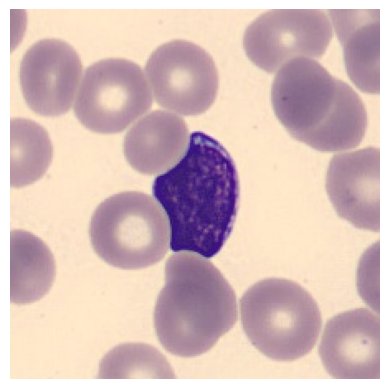

The shape of an image is (224, 224)
The image mode is RGB


In [13]:
# Script to plot an image
# TUMORAL PATIENT
directory_path = "/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P1"
file_name = "000001.jpg"
file_path = os.path.join(directory_path,file_name)
print(f"The file path is {file_path}")

img = Image.open(file_path)

plt.imshow(img)
plt.axis('off')  
plt.show()

print(f"The shape of an image is {img.size}")
print(f"The image mode is {img.mode}")


#### <b> Plot an image of a reactive patient </b>

The file path is /kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P54/000001.jpg


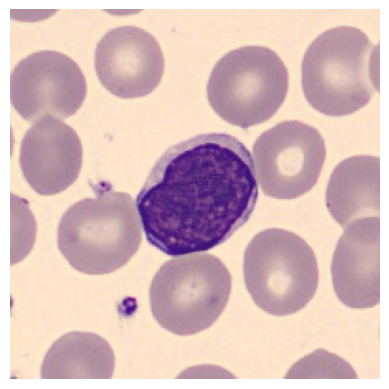

The shape of an image is (224, 224)
The image mode is RGB


In [14]:
# Script to plot an image
# REACTIVE PATIENT
directory_path = "/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/P54"
file_name = "000001.jpg"
file_path = os.path.join(directory_path,file_name)
print(f"The file path is {file_path}")

img = Image.open(file_path)

plt.imshow(img)
plt.axis('off')  
plt.show()

print(f"The shape of an image is {img.size}")
print(f"The image mode is {img.mode}")


----
## <b> 2 - Browse the files </b>

#### <b> List number of patients in train set and in the test set </b>

In [15]:
# Paths to the training and testing directories
directory_path_train = "/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset"
directory_path_test = "/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/testset"

# List only directories within the training directory
train_patients = [name for name in os.listdir(directory_path_train) if os.path.isdir(os.path.join(directory_path_train, name))]
print(f"There are {len(train_patients)} patients in the train set")

# List only directories within the testing directory
test_patients = [name for name in os.listdir(directory_path_test) if os.path.isdir(os.path.join(directory_path_test, name))]
print(f"There are {len(test_patients)} patients in the test set")


There are 163 patients in the train set
There are 42 patients in the test set


#### <b> Count and Display number of images per patient </b>

In [16]:
# Function to count images for each patient
def count_images_per_patient(directory_path):
    patient_dirs = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
    image_count_per_patient = {}
    for patient in patient_dirs:
        patient_path = os.path.join(directory_path, patient)
        images = [img for img in os.listdir(patient_path) if img.endswith('.jpg')]
        image_count_per_patient[patient] = len(images)
    return image_count_per_patient

# Counting images for each patient in the training set
train_image_counts = count_images_per_patient(directory_path_train)
print(f"There are {len(train_image_counts)} patients in the train set.")
for patient, count in train_image_counts.items():
    print(f"Patient ID: {patient}, Image Count: {count}")

# Counting images for each patient in the testing set
test_image_counts = count_images_per_patient(directory_path_test)
print(f"\nThere are {len(test_image_counts)} patients in the test set.")
for patient, count in test_image_counts.items():
    print(f"Patient ID: {patient}, Image Count: {count}")


There are 163 patients in the train set.
Patient ID: P135, Image Count: 108
Patient ID: P62, Image Count: 16
Patient ID: P201, Image Count: 66
Patient ID: P101, Image Count: 52
Patient ID: P50, Image Count: 43
Patient ID: P34, Image Count: 50
Patient ID: P17, Image Count: 43
Patient ID: P51, Image Count: 45
Patient ID: P189, Image Count: 102
Patient ID: P116, Image Count: 32
Patient ID: P54, Image Count: 40
Patient ID: P146, Image Count: 33
Patient ID: P36, Image Count: 49
Patient ID: P190, Image Count: 114
Patient ID: P162, Image Count: 50
Patient ID: P177, Image Count: 70
Patient ID: P122, Image Count: 57
Patient ID: P200, Image Count: 34
Patient ID: P187, Image Count: 49
Patient ID: P77, Image Count: 69
Patient ID: P95, Image Count: 74
Patient ID: P130, Image Count: 53
Patient ID: P142, Image Count: 73
Patient ID: P80, Image Count: 56
Patient ID: P155, Image Count: 64
Patient ID: P3, Image Count: 66
Patient ID: P179, Image Count: 41
Patient ID: P118, Image Count: 42
Patient ID: P186

#### <b> Count the number of images for tumoral vs reactive patients </b>

In [18]:
directory_path_train = "/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset"

# Counting images for each patient in the training set
train_image_counts = count_images_per_patient(directory_path_train)

# Load the dataset to get labels
df = pd.read_csv("/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/trainset_true.csv")

df['Num_Images'] = df['ID'].apply(lambda x: train_image_counts.get(str(x), 0))

# Calculate the total number of images for tumoral (1) and reactive (0) patients
total_images_tumoral = df[df['LABEL'] == 1]['Num_Images'].sum()
total_images_reactive = df[df['LABEL'] == 0]['Num_Images'].sum()

print(f"Total number of images for tumoral patients: {total_images_tumoral}")
print(f"Total number of images for reactive patients: {total_images_reactive}")
print(f"Repartition of Reactive / Tumoral patients: {total_images_reactive/total_images_tumoral}")


Total number of images for tumoral patients: 10861
Total number of images for reactive patients: 2592
Repartition of Reactive / Tumoral patients: 0.2386520578215634


#### <b> Plot the histograms of the size of number of images per patient in training vs testing set </b>

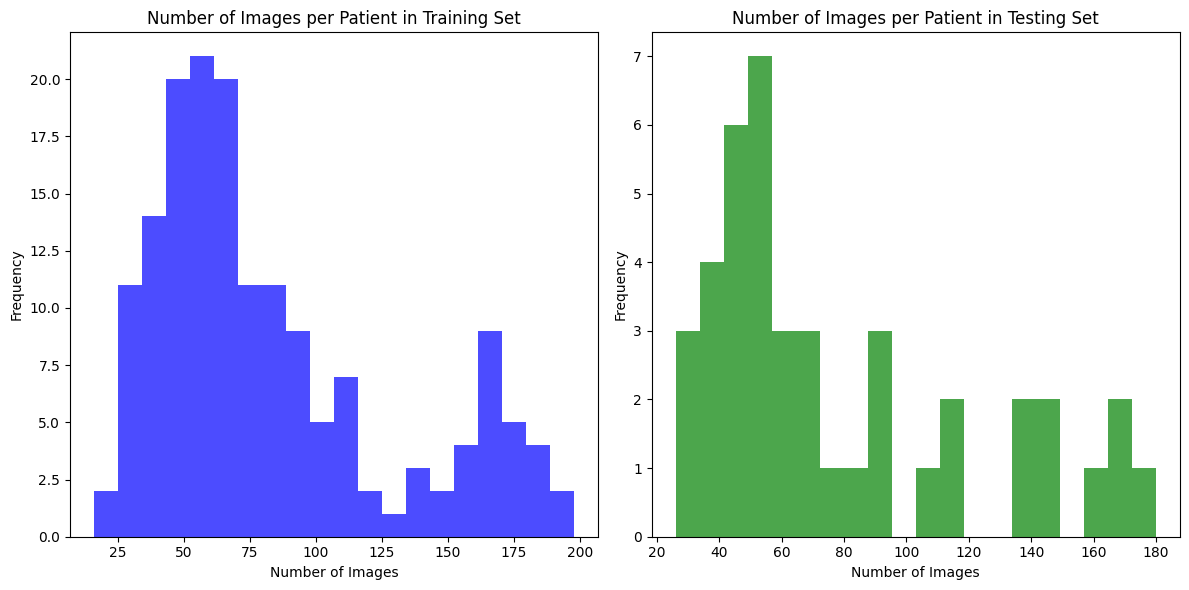

In [19]:
train_image_counts = [count for patient, count in train_image_counts.items()]
test_image_counts = [count for patient, count in test_image_counts.items()]

# Plotting the histogram for the training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_image_counts, bins=20, color='blue', alpha=0.7)
plt.title('Number of Images per Patient in Training Set')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')

# Plotting the histogram for the testing set
plt.subplot(1, 2, 2)
plt.hist(test_image_counts, bins=20, color='green', alpha=0.7)
plt.title('Number of Images per Patient in Testing Set')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


----
## <b> 3 - Analyze the train set - gender and classes </b>

#### <b> Count the number of tumoral and reactive patients , look at the genders </b>

In [21]:
df = pd.read_csv("/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/trainset_true.csv")

# Count the number of occurrences of each label
label_counts = df['LABEL'].value_counts()
# Count the number of M and F of each label
# Correcting the 'f' to 'F' in the GENDER column
df['GENDER'] = df['GENDER'].str.upper()
gender_counts = df['GENDER'].value_counts()

# Print the counts
print("Number of HEALTHY PATIENTS: ", label_counts[0])
print("Number of SICK PATIENTS: ", label_counts[1])
print("Number of MALE: ",gender_counts['M'])
print("Number of FEMALE: ",gender_counts['F'])

gender_counts_by_label = df.groupby('LABEL')['GENDER'].value_counts()
print(gender_counts_by_label)



Number of HEALTHY PATIENTS:  50
Number of SICK PATIENTS:  113
Number of MALE:  82
Number of FEMALE:  81
LABEL  GENDER
0      F         26
       M         24
1      M         58
       F         55
Name: count, dtype: int64


#### <b> Plot the repartition between Tumoral vs Reactive patients and Male / Female </b>

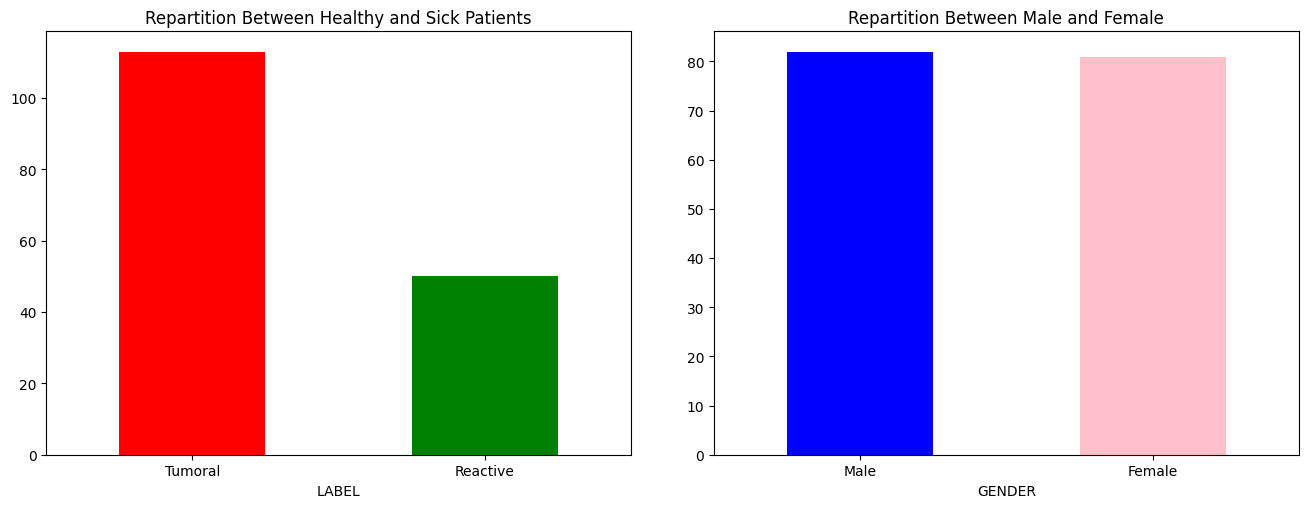

In [22]:
plt.figure(figsize=(14, 6)) 

# First histogram (Healthy vs Sick Patients)
plt.subplot(1, 2, 1)
label_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Repartition Between Healthy and Sick Patients')
plt.xticks(ticks=[0, 1], labels=['Tumoral', 'Reactive'], rotation=0)

# Second histogram (Male vs Female)
plt.subplot(1, 2, 2)
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Repartition Between Male and Female')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)

plt.tight_layout(pad=4.0)  # Increase padding for better spacing
plt.show()


#### <b> Plot Male/Female Repartitio by Class </b>

<Figure size 600x400 with 0 Axes>

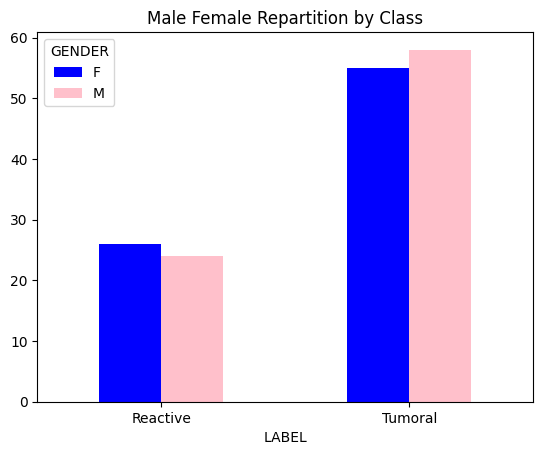

In [23]:
# Third histogram (Male Female by Class)
plt.figure(figsize=(6, 4))
gender_counts_by_label.unstack().plot(kind='bar', color=['blue', 'pink'])
plt.title('Male Female Repartition by Class')
plt.xticks(ticks=[0, 1], labels=['Reactive', 'Tumoral'], rotation=0)
plt.show()

----
## <b> 4 - Analyze the train set - lymph_count and DOB </b>

#### <b> Lymph_Count </b>

In [24]:
df = pd.read_csv("/kaggle/input/dlmi-mms-data/dlmi-lymphocytosis-classification/trainset/trainset_true.csv")

mean_lymph_counts = df.groupby('LABEL')['LYMPH_COUNT'].mean()
max_lymph_counts = df.groupby('LABEL')['LYMPH_COUNT'].max()
min_lymph_counts = df.groupby('LABEL')['LYMPH_COUNT'].min()
std_lymph_counts = df.groupby('LABEL')['LYMPH_COUNT'].std()



# Print the mean LYMPH_COUNT for each class
print("Mean LYMPH_COUNT for class 0: ", mean_lymph_counts[0])
print("Mean LYMPH_COUNT for class 1: ", mean_lymph_counts[1])

print("Max LYMPH_COUNT for class 0: ", max_lymph_counts[0])
print("Max LYMPH_COUNT for class 1: ", max_lymph_counts[1])

print("Min LYMPH_COUNT for class 0: ", min_lymph_counts[0])
print("Min LYMPH_COUNT for class 1: ", min_lymph_counts[1])

print("STD LYMPH_COUNT for class 0: ", std_lymph_counts[0])
print("STD LYMPH_COUNT for class 1: ", std_lymph_counts[1])


# Calculate the maximum LYMPH_COUNT for class 0
max_lymph_count_class_0 = df[df['LABEL'] == 0]['LYMPH_COUNT'].max()

# Filter patients of class 1 where LYMPH_COUNT is smaller than the max LYMPH_COUNT for class 0
filtered_patients = df[(df['LABEL'] == 1) & (df['LYMPH_COUNT'] < mean_lymph_counts[0])]

# Count the number of such patients
num_patients = filtered_patients.shape[0]

# Print the result
print("Number of patients in class 1 with LYMPH_COUNT smaller than the mean LYMPH_COUNT for class 0: ", num_patients)


Mean LYMPH_COUNT for class 0:  5.005199999999999
Mean LYMPH_COUNT for class 1:  35.9012389380531
Max LYMPH_COUNT for class 0:  7.68
Max LYMPH_COUNT for class 1:  295.0
Min LYMPH_COUNT for class 0:  4.01
Min LYMPH_COUNT for class 1:  2.28
STD LYMPH_COUNT for class 0:  1.0032279330811547
STD LYMPH_COUNT for class 1:  53.57278398744658
Number of patients in class 1 with LYMPH_COUNT smaller than the mean LYMPH_COUNT for class 0:  10


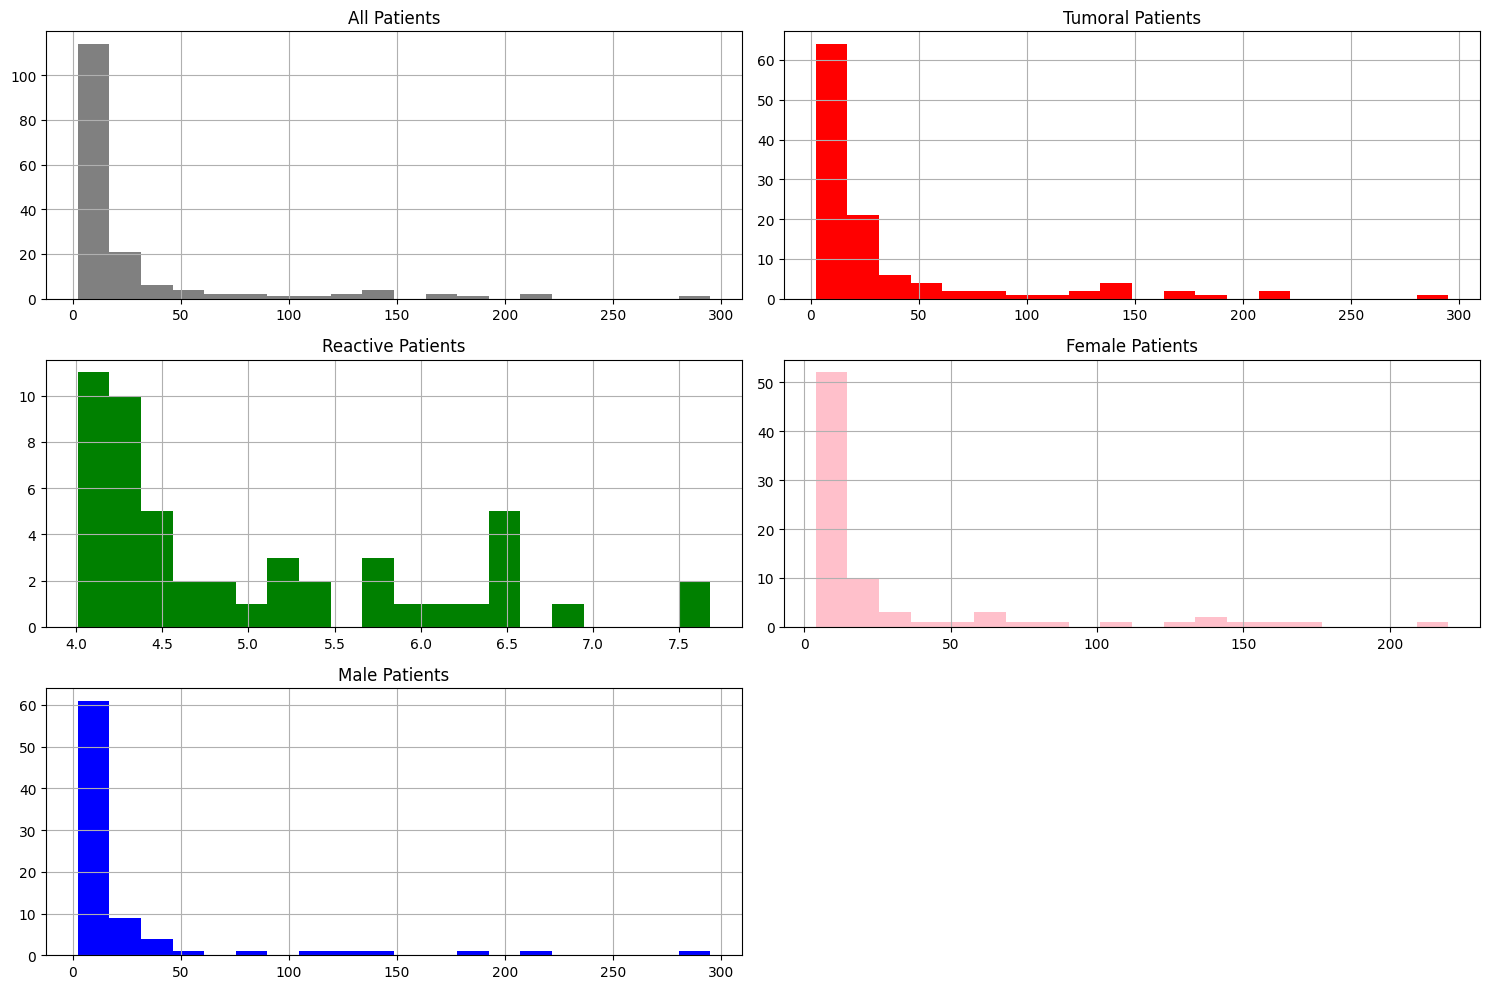

In [27]:
# Plotting five histograms for LYMPH_COUNT distributions
plt.figure(figsize=(15, 10))

# Histogram for the repartition of the lymph count for all the patients
plt.subplot(3, 2, 1)
df['LYMPH_COUNT'].hist(bins=20, color='gray')
plt.title('All Patients')

# Histogram for the repartition of the lymph count for tumoral patients
plt.subplot(3, 2, 2)
df[df['LABEL'] == 1]['LYMPH_COUNT'].hist(bins=20, color='red')
plt.title('Tumoral Patients')

# Histogram for the repartion of the lymph counts for reactive patients
plt.subplot(3, 2, 3)
df[df['LABEL'] == 0]['LYMPH_COUNT'].hist(bins=20, color='green')
plt.title('Reactive Patients')

# Histogram for the repartition of the lymph counts for female patients
plt.subplot(3, 2, 4)
df[df['GENDER'] == 'F']['LYMPH_COUNT'].hist(bins=20, color='pink')
plt.title('Female Patients')

# Histogram for the repartition of the lymph counts for male patients
plt.subplot(3, 2, 5)
df[df['GENDER'] == 'M']['LYMPH_COUNT'].hist(bins=20, color='blue')
plt.title('Male Patients')

plt.tight_layout()
plt.show()

#### <b> YOB </b>

In [28]:
def parse_date_with_multiple_formats(date):
    formats = ['%m/%d/%Y', '%d-%m-%Y']  # List of formats to try
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt).year
        except ValueError:
            continue
    return None  # Return None if all formats fail

In [29]:
# Apply the custom function to the 'DOB' column
df['Year_of_Birth'] = df['DOB'].apply(parse_date_with_multiple_formats)

# Calculating the mean year of birth for each class
mean_year_of_birth = df.groupby('LABEL')['Year_of_Birth'].mean()
max_year_of_birth = df.groupby('LABEL')['Year_of_Birth'].max()
min_year_of_birth = df.groupby('LABEL')['Year_of_Birth'].min()
std_year_of_birth = df.groupby('LABEL')['Year_of_Birth'].std()


# Print the mean LYMPH_COUNT for each class
print("Mean YOB for class 0: ", mean_year_of_birth[0])
print("Mean YOB for class 1: ", mean_year_of_birth[1])

print("Max YOB for class 0: ", max_year_of_birth[0])
print("Max YOB for class 1: ", max_year_of_birth[1])

print("Min YOB for class 0: ", min_year_of_birth[0])
print("Min YOB for class 1: ", min_year_of_birth[1])

print("STD YOB for class 0: ", std_year_of_birth[0])
print("STD YOB for class 1: ", std_year_of_birth[1])

# Printing the results
print(mean_year_of_birth)



Mean YOB for class 0:  1965.74
Mean YOB for class 1:  1944.8230088495575
Max YOB for class 0:  1998
Max YOB for class 1:  1987
Min YOB for class 0:  1927
Min YOB for class 1:  1921
STD YOB for class 0:  19.766814077526767
STD YOB for class 1:  12.041765183025928
LABEL
0    1965.740000
1    1944.823009
Name: Year_of_Birth, dtype: float64


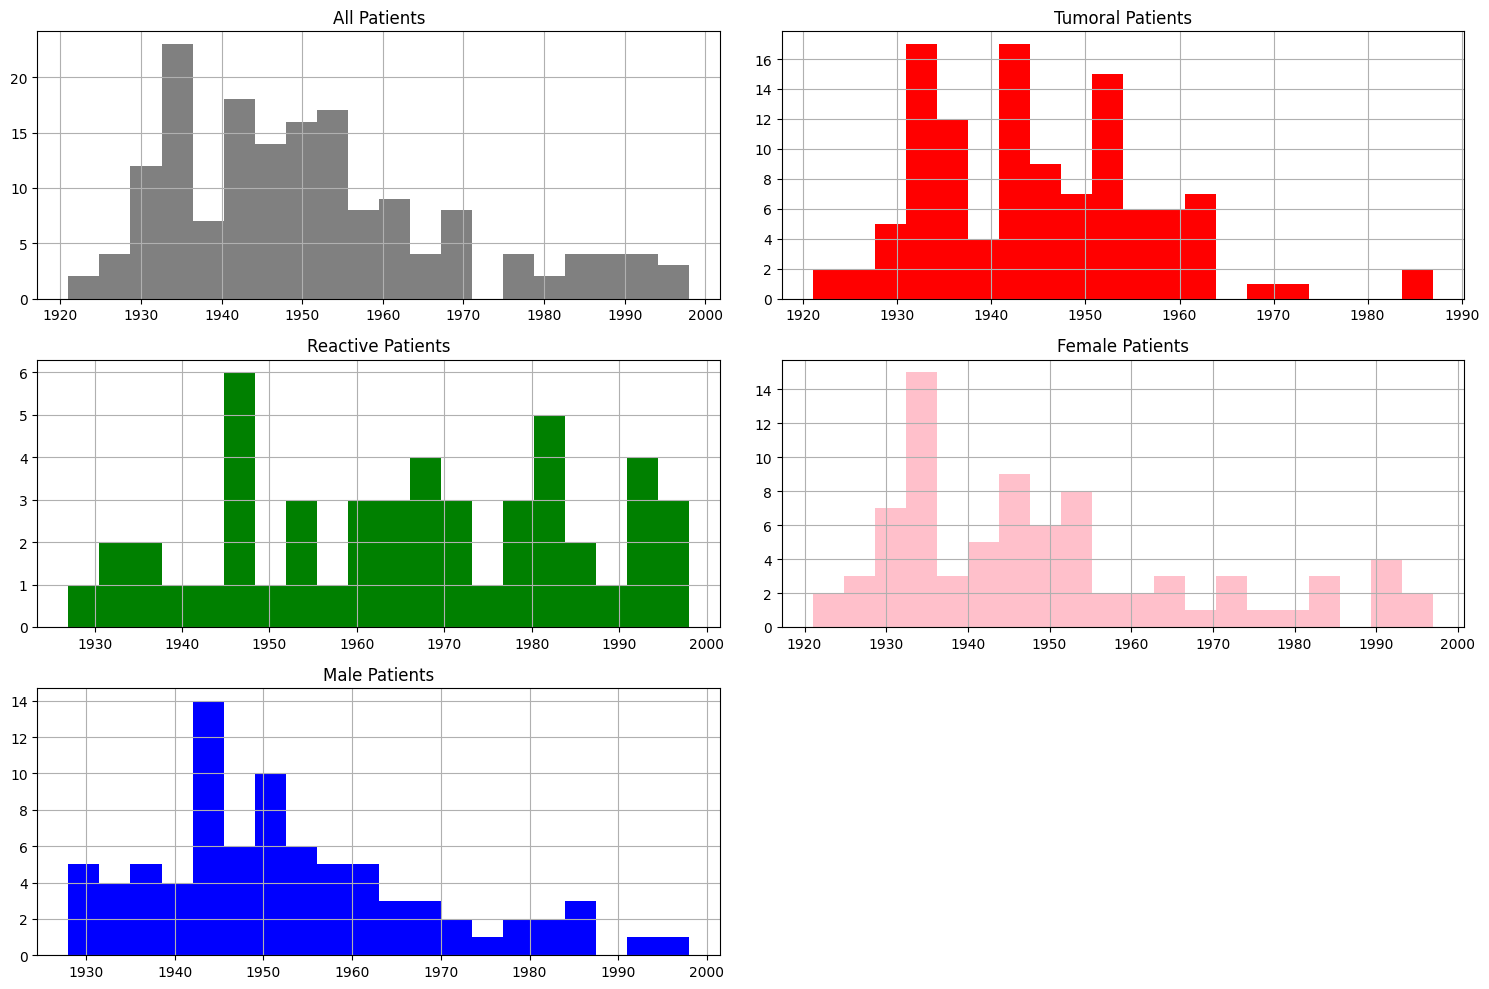

In [30]:
# Plotting five histograms for Year of Birth distributions
plt.figure(figsize=(15, 10))

# Histogram for the repartition of the Year of Birth for all patients
plt.subplot(3, 2, 1)
df['Year_of_Birth'].hist(bins=20, color='gray')
plt.title('All Patients')

# Histogram for the repartition of the Year of Birth for tumoral patients
plt.subplot(3, 2, 2)
df[df['LABEL'] == 1]['Year_of_Birth'].hist(bins=20, color='red')
plt.title('Tumoral Patients')

# Histogram for the repartition of the Year of Birth for reactive patients
plt.subplot(3, 2, 3)
df[df['LABEL'] == 0]['Year_of_Birth'].hist(bins=20, color='green')
plt.title('Reactive Patients')

# Histogram for the repartition of the Year of Birth for female patients
plt.subplot(3, 2, 4)
df[df['GENDER'] == 'F']['Year_of_Birth'].hist(bins=20, color='pink')
plt.title('Female Patients')

# Histogram for the repartition of the Year of Birth for male patients
plt.subplot(3, 2, 5)
df[df['GENDER'] == 'M']['Year_of_Birth'].hist(bins=20, color='blue')
plt.title('Male Patients')

plt.tight_layout()
plt.show()

----
----